In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
!pip install lightgbm

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

pd.set_option('display.max_columns', 100)

In [ ]:
pd.set_option("display.max_columns", 100)
DATA_PATH = Path.cwd().parent / "data" / "final" / "public"

EDA

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [64]:
X = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\training_set_features.csv")


y = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\training_set_labels.csv")

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (26707, 36)
y shape: (26707, 3)


In [65]:
data = X.merge(y, on = 'respondent_id')
data.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    1.0               0.0                   0.0   
2                    0.0               NaN                   NaN   
3                    0.0               0.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    1.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            0.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          3.0                1.0   
1               1.0                          5.0                4.0   
2               NaN                          3.0                1.0   
3               NaN                          3.0                3.0   
4               NaN                          3.0                3.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          2.0                          2.0   
1                          4.0                          4.0   
2                          1.0                          4.0   
3                          5.0                          5.0   
4                          2.0                          3.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          2.0  55 - 64 Years   
1                2.0                          4.0  35 - 44 Years   
2                1.0                          2.0  18 - 34 Years   
3                4.0                          1.0      65+ Years   
4                1.0                          4.0  45 - 54 Years   

          education   race     sex             income_poverty marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  rent_or_own   employment_status hhs_geo_region                census_msa  \
0         Own  Not in Labor Force       oxchjgsf                   Non-MSA   
1        Rent            Employed       bhuqouqj  MSA, Not Principle  City   
2         Own         

In [66]:
test = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\test_set_features.csv")

In [67]:
test.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707           2.0             2.0                        0.0   
1          26708           1.0             1.0                        0.0   
2          26709           2.0             2.0                        0.0   
3          26710           1.0             1.0                        0.0   
4          26711           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   
2                          1.0                      1.0   
3                          0.0                      0.0   
4                          1.0                      1.0   

   behavioral_touch_face  doctor_recc_h1n1  doctor_recc_seasonal  \
0                    1.0               0.0                   0.0   
1                    0.0               0.0                   0.0   
2                    1.0               0.0                   0.0   
3                    0.0               1.0                   1.0   
4                    1.0               0.0                   0.0   

   chronic_med_condition  child_under_6_months  health_worker  \
0                    0.0                   0.0            0.0   
1                    0.0                   0.0            0.0   
2                    0.0                   0.0            0.0   
3                    1.0                   0.0            0.0   
4                    0.0                   0.0            1.0   

   health_insurance  opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0               1.0                          5.0                1.0   
1               0.0                          4.0                1.0   
2               NaN                          5.0                4.0   
3               1.0                          4.0                2.0   
4               1.0                          5.0                2.0   

   opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                          1.0                          5.0   
1                          1.0                          4.0   
2                          2.0                          5.0   
3                          2.0                          4.0   
4                          4.0                          4.0   

   opinion_seas_risk  opinion_seas_sick_from_vacc      age_group  \
0                1.0                          1.0  35 - 44 Years   
1                1.0                          1.0  18 - 34 Years   
2                4.0                          4.0  55 - 64 Years   
3                4.0                          2.0      65+ Years   
4                4.0                          2.0  35 - 44 Years   

          education      race     sex             income_poverty  \
0  College Graduate  Hispanic  Female                  > $75,000   
1          12 Years     White    Male              Below Poverty   
2  College Graduate     White    Male                  > $75,000   
3          12 Years     White  Female  <= $75,000, Above Poverty   
4          12 Years     Black  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married        Rent            Employed       mlyzmhmf   
1    Not Married        Rent            Employed       bhuqouqj   
2        Married         Own            Employed       lrircsnp   
3        Married         Own  Not in Labor Force       lrirc

EDA

In [19]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=06f6709f641acb1b9773a1367ea11b758d27b9fa8236890bc27828c3a43e9c9b
  Stored in directory: C:\Users\ratho\AppData\Local\Temp\pip-ephem-wheel-cache-clxm2u3x\wheels\43\c8\f4\c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=093d0f9f0e6a485852775c77f64434402e934447e33e553311a74d65798811c3
  Stored in directory: c:\users\ratho\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6d

In [68]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

profile = ProfileReport(X, title="Pandas Profiling Report")
profile.to_file("your_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

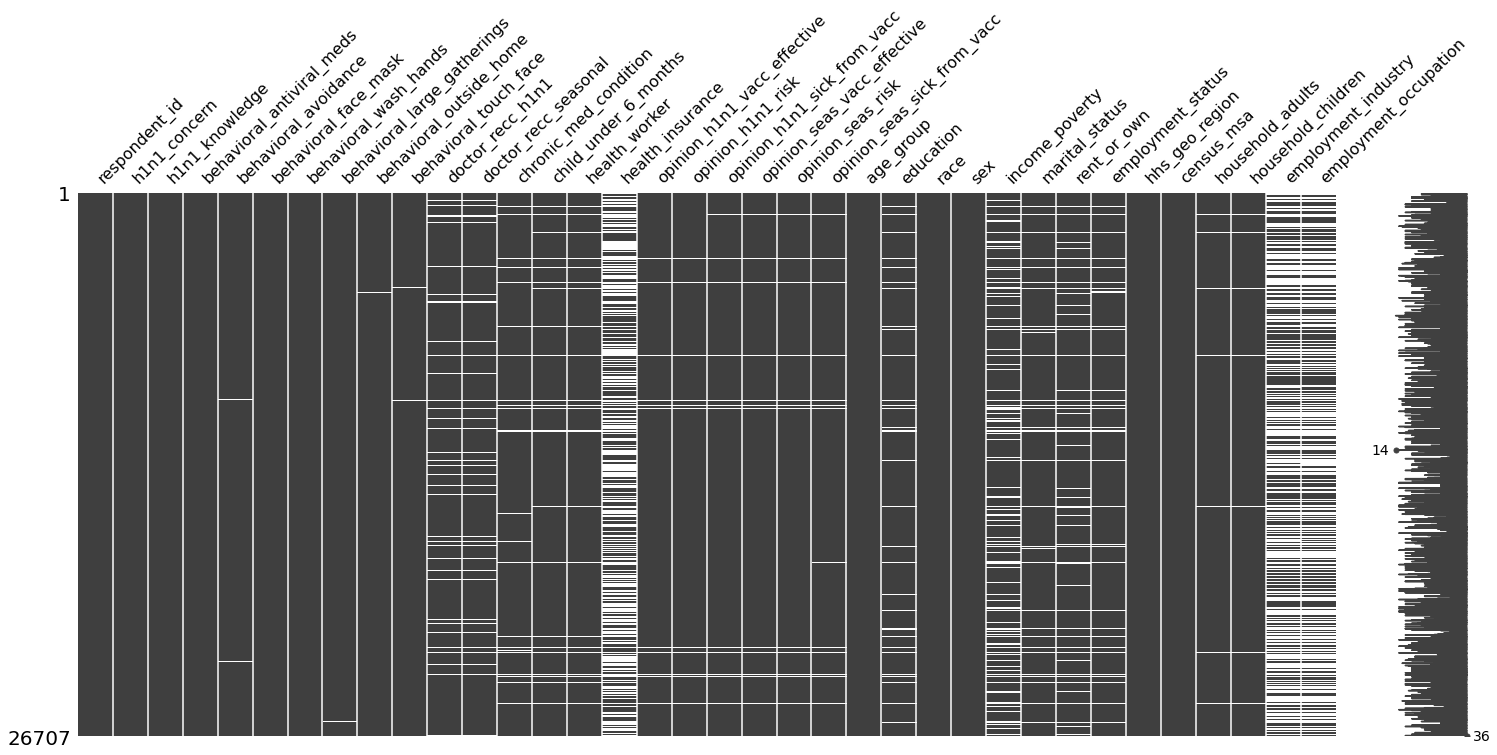

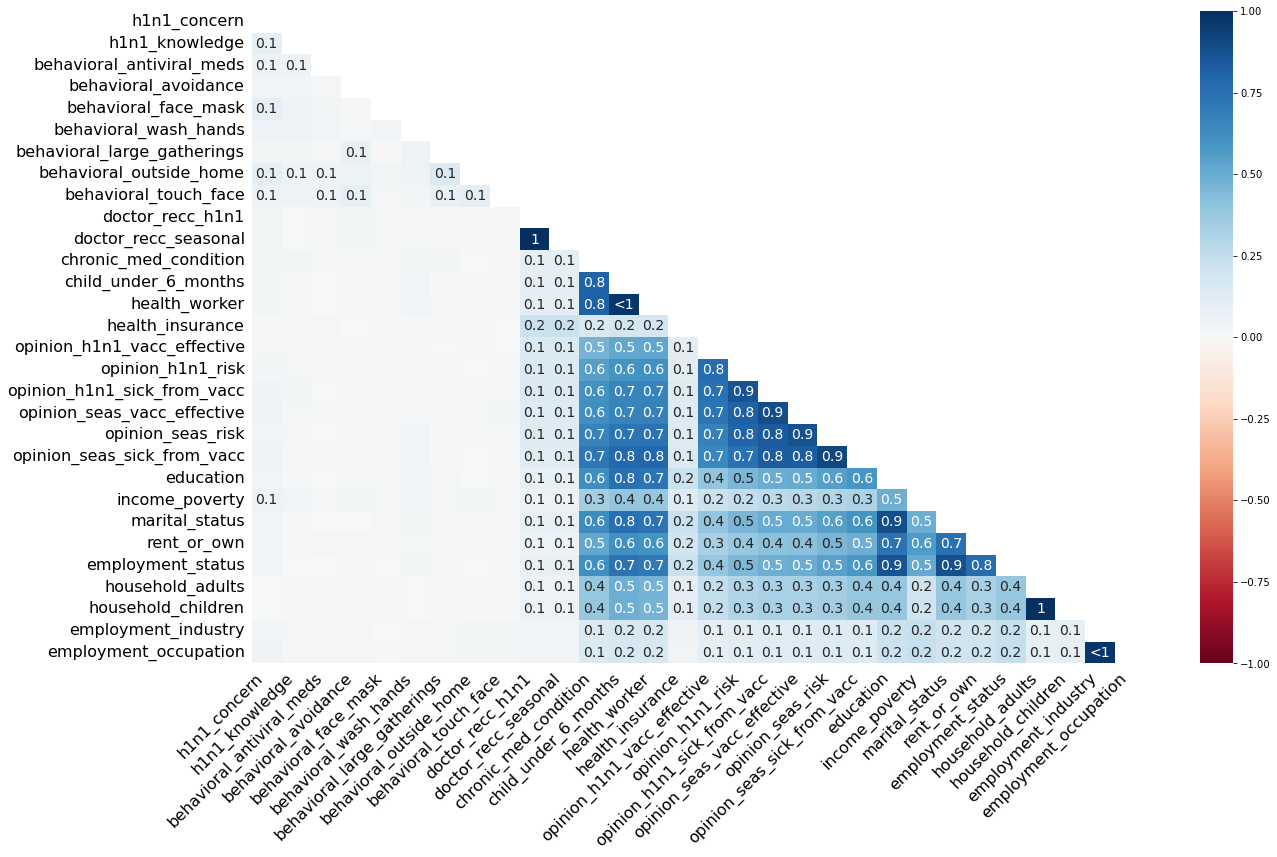

In [52]:
#checking missingness of the data
!pip install missingno
import missingno as msno
%matplotlib inline
msno.matrix(X)
msno.heatmap(X)

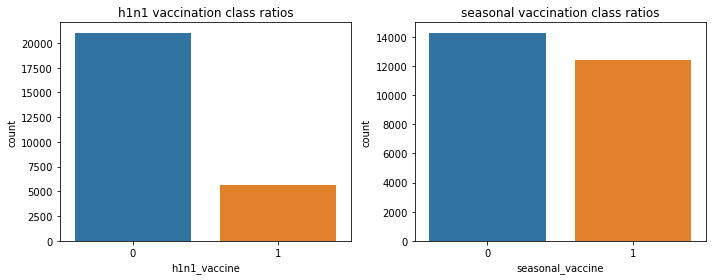

In [25]:
#class blance check
fig, ax = plt.subplots(figsize = (10, 4), ncols = 2)

sns.countplot(data['h1n1_vaccine'], ax = ax[0])
sns.countplot(data['seasonal_vaccine'], ax = ax[1])

ax[0].set_title('h1n1 vaccination class ratios')
ax[1].set_title('seasonal vaccination class ratios')

plt.tight_layout()
plt.show()



In [26]:
data['h1n1_vaccine'].value_counts(normalize = True)
#I may need to use some sort of class balancing tecnhique for h1n1, as the ratio there is 80-to-20 for the favor of 0 class

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [ ]:
#NA check
data.isnull().sum()


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [27]:
test.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [28]:
data_columns = data.columns.tolist()
data_columns.remove('respondent_id')

In [29]:
for col in data_columns:
    print(data[col].value_counts(dropna = False), '\n')

2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64 

1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64 

0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64 

1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64 

0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64 

1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64 

0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64 

0.0    17644
1.0     8981
NaN       82
Name: behavioral_outside_home, dtype: int64 

1.0    18001
0.0     8578
NaN      128
Name: behavioral_touch_face, dtype: int64 

0.0    19139
1.0     5408
NaN     2160
Name: doctor_recc_h1n1, dtype: int64 

0.0    16453
1.0     8094
NaN     2160
Name: doctor_recc_seasonal, dtype: int64 

0.0    18446
1.0     7290
NaN      971
Name: chronic_med_con

In [30]:
def drops_nans(df):
    
    df['employment_industry_known'] = df['employment_industry'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    df['employment_occupation_known'] = df['employment_occupation'].fillna('unknown').apply(lambda x: 1 if x != 'unknown' else 0)
    
    df['sex_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
    df['marital_status_married'] = df['marital_status'].apply(lambda x: 1 if x == 'Married' else (0 if x == 'Not Married' else x))
    df['rent_or_own_own'] = df['rent_or_own'].apply(lambda x: 1 if x == 'Own' else (0 if x == 'Rent' else x))

    df.drop(['employment_industry', 'employment_occupation', 'sex', 'marital_status', 'rent_or_own'], 1, inplace = True)
    
    return df
data = drops_nans(data)
test = drops_nans(test)

In [31]:
#Feature engineering
h1n1_cat = data.drop(['respondent_id', 'seasonal_vaccine'], 1).copy()
seasonal_cat = data.drop(['respondent_id', 'h1n1_vaccine'], 1).copy()
test_cat = test.copy()
h1n1_cat.to_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\h1n1_catboost.csv", index = False)


In [ ]:
seasonal_cat.to_csv("/content/drive/MyDrive/Steve Team project ML/seasonal_catboost.csv", index = False)
test_cat.to_csv("/content/drive/MyDrive/Steve Team project ML/test_catboost.csv", index = False)


In [ ]:
#one hot encoding

In [ ]:
h1n1 = pd.read_csv(DATA_PATH / "/content/drive/MyDrive/Steve Team project ML/h1n1_encoded.csv")

In [71]:
to_one_hot_encode_h1n1 = h1n1.dtypes[h1n1.dtypes == 'O'].index.tolist()
to_one_hot_encode_seasonal = seasonal.dtypes[seasonal.dtypes == 'O'].index.tolist()
to_one_hot_encode_test = test.dtypes[test.dtypes == 'O'].index.tolist()

In [ ]:
#LGBM using categorical features
#h1n1

In [62]:
h1n1_cat = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\h1n1_catboost.csv")



X_lgb = h1n1_cat.drop(['h1n1_vaccine'], 1)
y_lgb = h1n1_cat['h1n1_vaccine'].copy()

print('Original shape:', h1n1_cat.shape)
print('X shape:', X_lgb.shape)
print('y shape:', y_lgb.shape)

Original shape: (26707, 36)
X shape: (26707, 35)
y shape: (26707,)


In [33]:
def lgb_cat_prepare(X):
    
    for col in X.dtypes[X.dtypes == 'object'].index.tolist():
        X[col] = X[col].fillna('None')

    for col in X.dtypes[X.dtypes == 'float64'].index.tolist():
        X[col] = X[col].fillna(-1).astype(pd.Int64Dtype())

    for col in X.columns.tolist():
        X[col] = X[col].astype('category')
        
    return X

In [34]:
X_lgb = lgb_cat_prepare(X_lgb)

In [36]:
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV


from lightgbm import LGBMClassifier


import time

import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model_name, model, X, y):
    
    predictions_probas = model.predict_proba(X)[:,1]

    AUC = roc_auc_score(y, predictions_probas)
    LogLoss = log_loss(y, predictions_probas)

    print('AUC for', model_name, ': %1.4f' % AUC)
    print('LogLoss for', model_name, ': %1.3f' % LogLoss)

    metrics_table = pd.DataFrame({'AUC' : [round(AUC, 4)], 'LogLoss' : [round(LogLoss, 3)]}, index = [model_name])
    
    return metrics_table

In [37]:
X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_lgb, y_lgb, test_size = 0.2, random_state = 20202020)

In [69]:
start = time.time()
print("Started at", str(time.ctime(int(start))))

LGB_params = {'boosting_type' : ['dart'],  
              'learning_rate' : [0.05],
              'num_leaves' : [35],
              'min_child_samples' : [1],
              'max_depth' : [25],
              'subsample' : [1],
              'colsample_bytree' : [0.8],
              'n_estimators' : [500]}

LGB = LGBMClassifier(random_state = 22, objective = 'binary', metric = 'auc')

GRID_LGB_h1n1 = GridSearchCV(LGB, param_grid = LGB_params, cv = 5, scoring = 'roc_auc', n_jobs = -1)

# lgb_categoricals = X_lgb_train.columns.tolist()
GRID_LGB_h1n1.fit(X_lgb_train, y_lgb_train) # categorical_feature = lgb_categoricals

print("Ended at", str(time.ctime(int(time.time()))))
print((time.time() - start) / 60, 'minutes')

Started at Fri Jul 22 18:52:16 2022


GridSearchCV(cv=5,
             estimator=LGBMClassifier(metric='auc', objective='binary',
                                      random_state=22),
             n_jobs=-1,
             param_grid={'boosting_type': ['dart'], 'colsample_bytree': [0.8],
                         'learning_rate': [0.05], 'max_depth': [25],
                         'min_child_samples': [1], 'n_estimators': [500],
                         'num_leaves': [35], 'subsample': [1]},
             scoring='roc_auc')

Ended at Fri Jul 22 18:52:44 2022
0.4569603204727173 minutes


In [70]:
evaluate_model('LightGBM h1n1 with categoricals', GRID_LGB_h1n1.best_estimator_, X_lgb_test, y_lgb_test)

AUC for LightGBM h1n1 with categoricals : 0.8601
LogLoss for LightGBM h1n1 with categoricals : 0.467


AUC  LogLoss
LightGBM h1n1 with categoricals  0.8601    0.467

In [ ]:
#seasonal

In [43]:
seasonal_cat = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\seasonal_catboost.csv")

X_lgb = seasonal_cat.drop(['seasonal_vaccine'], 1)
y_lgb = seasonal_cat['seasonal_vaccine'].copy()

print('Original shape:', seasonal_cat.shape)
print('X shape:', X_lgb.shape)
print('y shape:', y_lgb.shape)

Original shape: (26707, 34)
X shape: (26707, 33)
y shape: (26707,)


In [44]:
X_lgb = lgb_cat_prepare(X_lgb)

In [45]:
X_lgb_train, X_lgb_test, y_lgb_train, y_lgb_test = train_test_split(X_lgb, y_lgb, test_size = 0.2, random_state = 20202020)

In [46]:

start = time.time()
print("Started at", str(time.ctime(int(start))))

LGB_params = {'boosting_type' : ['gbdt'], 
              'learning_rate' : [0.05],
              'num_leaves' : [25],
              'min_child_samples' : [1],
              'max_depth' : [13],
              'subsample' : [1],
              'colsample_bytree' : [1/2],
              'n_estimators' : [200]}

LGB = LGBMClassifier(random_state = 20202020, objective = 'binary', metric = 'auc')

GRID_LGB_seasonal = GridSearchCV(LGB, param_grid = LGB_params, cv = 5, scoring = 'roc_auc', n_jobs = -1)

# lgb_categoricals = X_lgb_train.columns.tolist()
GRID_LGB_seasonal.fit(X_lgb_train, y_lgb_train) # categorical_feature = lgb_categoricals

print("Ended at", str(time.ctime(int(time.time()))))
print((time.time() - start) / 60, 'minutes')

Started at Fri Jul 22 13:25:50 2022
Ended at Fri Jul 22 13:25:54 2022
0.05929669539133708 minutes


In [47]:
evaluate_model('LightGBM seasonal with categoricals', GRID_LGB_seasonal.best_estimator_, X_lgb_test, y_lgb_test)

AUC for LightGBM seasonal with categoricals : 0.8617
LogLoss for LightGBM seasonal with categoricals : 0.463


AUC  LogLoss
LightGBM seasonal with categoricals  0.8617    0.463

In [50]:
test = pd.read_csv(r"C:\Users\ratho\Desktop\MMA subs\Steve ML\Steve Team project ML\test_catboost.csv")
respondent_id = test['respondent_id'].copy()
test.drop(['respondent_id'], 1, inplace = True)

test = lgb_cat_prepare(test)

In [51]:
submission = pd.DataFrame(respondent_id)
submission['h1n1_vaccine'] = GRID_LGB_h1n1.best_estimator_.predict_proba(test)[:,1]
submission['seasonal_vaccine'] = GRID_LGB_seasonal.best_estimator_.predict_proba(test)[:,1]

submission.head()

ValueError: Number of features of the model must match the input. Model n_features_ is 33 and input n_features is 35

In [ ]:
submission.to_csv('../../data/submissions/first_submission_lightgbm.csv', index = False)

In [ ]:
submission.to_csv("/content/drive/MyDrive/Steve Team project ML/test_catboost", index = False)

In [54]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', None)

In [60]:
items = list(X_lgb.columns)